# Brintey's Page Analysis
## Working with Youtube API
Now that we have extracted data from the user's channel, we will create a data frame from the json file. In this case we extracted data - channel info and data about each video from Britney Spears' account. Let's create the data structure and analyze Britney's Youtube account. 

It's important to notice that we are missing some videos, like the famous one 'Oops I did it again', and we notice that the likes on some videos are not matching the likes on the same youtube video when you look it up online. This happens because the API is not accurate sometimes or some of the calls just fail. So in this project we will work with the data available to us!

In [1]:
import json
import pandas as pd

In [90]:
filename = "britney_spears.json"
with open(filename, 'r') as f:
    channel_data = json.load(f)

This is how the json file looks like:

In [13]:
channel_data

{'UCgffc95YDBlkGrBAJUHUmXQ': {'channelData': {'viewCount': '6662315745',
   'subscriberCount': '8810000',
   'hiddenSubscriberCount': False,
   'videoCount': '70'},
  'videosData': {'bMG_mbA7Zpk': {'videoTitle': 'Britney Spears - The Zone - Mural Timelapse',
    'publishedAt': '2020-01-07T23:47:55Z',
    'statistics': {'viewCount': '168591',
     'likeCount': '6324',
     'dislikeCount': '234',
     'favoriteCount': '0',
     'commentCount': '450'}},
   'TWzswzS-giI': {'videoTitle': 'Get In The Zone Sweeps',
    'publishedAt': '2019-11-22T22:29:03Z',
    'statistics': {'viewCount': '114631',
     'likeCount': '8597',
     'dislikeCount': '190',
     'favoriteCount': '0',
     'commentCount': '652'}},
   'PC9quhvnT7Q': {'videoTitle': 'Britney Spears - ...Baby One More Time 20th Anniversary (Part 3)',
    'publishedAt': '2018-12-17T17:46:42Z',
    'statistics': {'viewCount': '376018',
     'likeCount': '8892',
     'dislikeCount': '222',
     'favoriteCount': '0',
     'commentCount': '5

In [91]:
stats = []
for video in channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData']:
    video_id = video
    stats.append(video_id)

In [111]:
# Some video titles have additional characters like 
# '&#39;' or '&quot;', we can remove that as
# shown below using the replace() method:

columns = []
for video_id in stats:
    video_title = channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData'][video_id]['videoTitle']
    if '&#39;' in video_title:
        video_title = video_title.replace('&#39;',' ')
    if '&quot;' in video_title:
        video_title = video_title.replace('&quot;', ' ')
    published_at = channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData'][video_id]['publishedAt']
    view_count = channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData'][video_id]['statistics']['viewCount']
    if view_count is not None:
        view_count = int(view_count)
    like_count = channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData'][video_id]['statistics'].get('likeCount', None)
    if like_count is not None:
        like_count = int(like_count)
    dislike_count = channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData'][video_id]['statistics'].get('dislikeCount', None)
    if dislike_count is not None:
        dislike_count = int(dislike_count)
    favorite_count = channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData'][video_id]['statistics'].get('favoriteCount', None)
    comment_count = channel_data['UCgffc95YDBlkGrBAJUHUmXQ']['videosData'][video_id]['statistics'].get('commentCount', None)
    if comment_count is not None:
        comment_count = int(comment_count)
    columns.append([video_id,video_title,published_at,view_count,like_count,dislike_count,favorite_count,comment_count])

In [93]:
df = pd.DataFrame(columns, columns=['video_id','video_title','published_at','view_count','like_count','dislike_count','favorite_count','comment_count'])
df

,video_id,video_title,published_at,view_count,like_count,dislike_count,favorite_count,comment_count
0,bMG_mbA7Zpk,Britney Spears - The Zone - Mural Timelapse,2020-01-07T23:47:55Z,168613,6324.0,233.0,0,450.0
1,TWzswzS-giI,Get In The Zone Sweeps,2019-11-22T22:29:03Z,114647,8597.0,189.0,0,652.0
2,PC9quhvnT7Q,Britney Spears - ...Baby One More Time 20th An...,2018-12-17T17:46:42Z,376070,8893.0,222.0,0,508.0
3,aFno7lFB2mI,Britney Spears - ...Baby One More Time 20th An...,2018-11-19T23:00:59Z,626602,15118.0,524.0,0,731.0
4,fakJNYnGAg4,Britney Spears - ...Baby One More Time 20th An...,2018-10-23T19:00:20Z,742055,26951.0,1017.0,0,1594.0
...,...,...,...,...,...,...,...,...
60,HHThqbWFYwo,Britney s Pre-Show Prayer,2008-12-23T16:57:24Z,544744,921.0,50.0,0,122.0
61,mAiNhwNSuyw,Womanizer Rehearsal for Japan s NTV Best Artis...,2008-12-17T05:16:20Z,552792,1258.0,54.0,0,230.0
62,zGav4QIxudY,Australian TV Commercial about Britney Spears,2008-12-15T20:03:48Z,301469,1046.0,44.0,0,85.0
63,8QBtwl5IoEY,Britney s Christmas Message,2008-12-11T02:48:14Z,1646915,4231.0,70.0,0,543.0


Let's see what video was the most viewed:

In [97]:
df['view_count'].max()

10363375

In [98]:
df[df['view_count'] == 10363375]

,video_id,video_title,published_at,view_count,like_count,dislike_count,favorite_count,comment_count
19,GVIv4rULrys,Britney Spears - Criminal Official Lyric Video,2011-10-17T19:22:29Z,10363375,51091.0,1668.0,0,3046.0


Here we see that 'Criminal' is the most viewed video from the videos we have in our data frame. Now let's visualize the top five most watched videos:

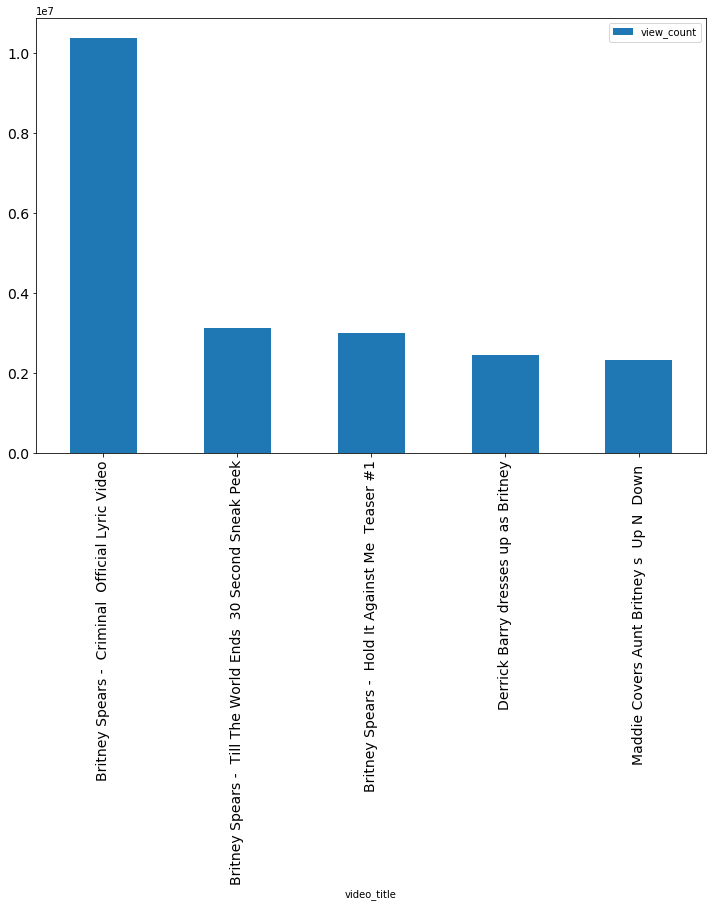

In [99]:
most_watched = df.sort_values(by=['view_count'],ascending=False)
ax = most_watched.head(5).plot.bar(x='video_title',y='view_count',figsize=(12,8),fontsize=14)


Now let's see what the average likes/dislikes are:

In [100]:
print('Average likes are ', round(df['like_count'].mean()))
print('Average dislikes are ', round(df['dislike_count'].mean()))

Average likes are  4653
Average dislikes are  231


Let's visualize the relationship between the likes and dislikes:

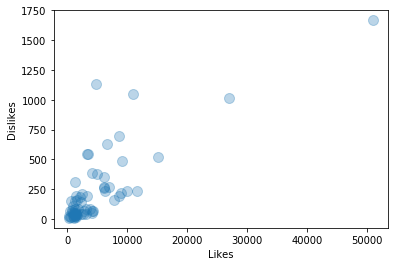

In [110]:
df['video_title'] =  df['video_title'].map({'setosa': 0, "versicolor": 1, "virginica": 2})

plt.scatter(df.like_count, df.dislike_count, s = 100, alpha=0.3)

plt.xlabel('Likes')
plt.ylabel('Dislikes')
plt.show()

We see that Britney's videos have way more likes than dislikes. We can also visualize the relationship between likes and dislikes regarding the number of views the videos got:

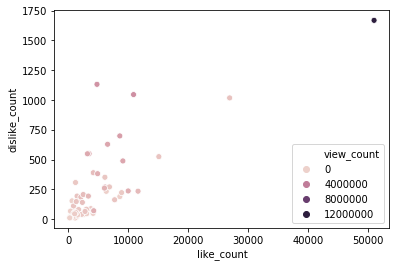

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="like_count",y="dislike_count",hue='view_count')

I would like to see the relationship between the comments and likes and comments and dislikes:

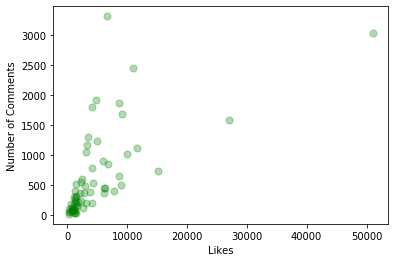

In [113]:
df['video_title'] =  df['video_title'].map({'setosa': 0, "versicolor": 1, "virginica": 2})

plt.scatter(df.like_count, df.comment_count, s = 50, alpha=0.3, color='green')

plt.xlabel('Likes')
plt.ylabel('Number of Comments')
plt.show()

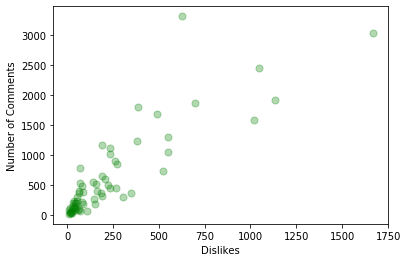

In [115]:
df['video_title'] =  df['video_title'].map({'setosa': 0, "versicolor": 1, "virginica": 2})

plt.scatter(df.dislike_count, df.comment_count, s = 50, alpha=0.3, color='green')

plt.xlabel('Dislikes')
plt.ylabel('Number of Comments')
plt.show()

It seems like the more dislikes there are, the more comments we see. This does not neccessarily mean these comments are bad. It's also important to notice that videos have usually a larger amount of likes than they have dislikes. So we can see that in the likes x-axis, values go from 0 to 50000, and most comments are seen when the likes are between 0 and 18000. In the second plot, most comments happen when dislikes are between 0 and 750.